In [19]:
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
# error import statsmodels.stats as sms
import time
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import scvelo as scv
import pegasus as pg
from matplotlib.pyplot import rc_context
from functools import partial
#import decoupler as dc



sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.2 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [ ]:
filtered=sc.read('Capillaries_INCITE_object.h5ad')

In [ ]:
def generate_labels(protein_name, percentiles):
    """Generates label names based on protein name and percentiles."""
    labels = [f"{protein_name}_0to{int(percentiles[0] * 100)}"]
    for i in range(len(percentiles)-1):
        labels.append(f"{protein_name}_{int(percentiles[i] * 100)}to{int(percentiles[i+1] * 100)}")
    labels.append(f"{protein_name}_{int(percentiles[-1] * 100)}to100")
    return labels
def categorize(val, quantiles, labels):
    """Categorize the value based on quantiles and assign a corresponding label."""
    for q, label in zip(quantiles, labels):
        if val <= q:
            return label
    return labels[-1]


In [ ]:
protein_name = "TDP_nCLR_H3"  # Change this to the desired protein name
column_name = f'total_counts_{protein_name}' 

percentiles = [0.1,0.25, 0.5, 0.75,0.9]

quantiles = adata.obs[column_name].quantile(percentiles)
labels = generate_labels(protein_name, percentiles)

adata.obs[f'pct_{protein_name}'] = adata.obs[column_name].apply(categorize, args=(quantiles, labels))

In [ ]:
print(adata.obs['pct_TDP_nCLR_H3'].value_counts())

In [ ]:
sc.tl.embedding_density(adata, basis='umap', groupby='pct_TDP_nCLR_H3')

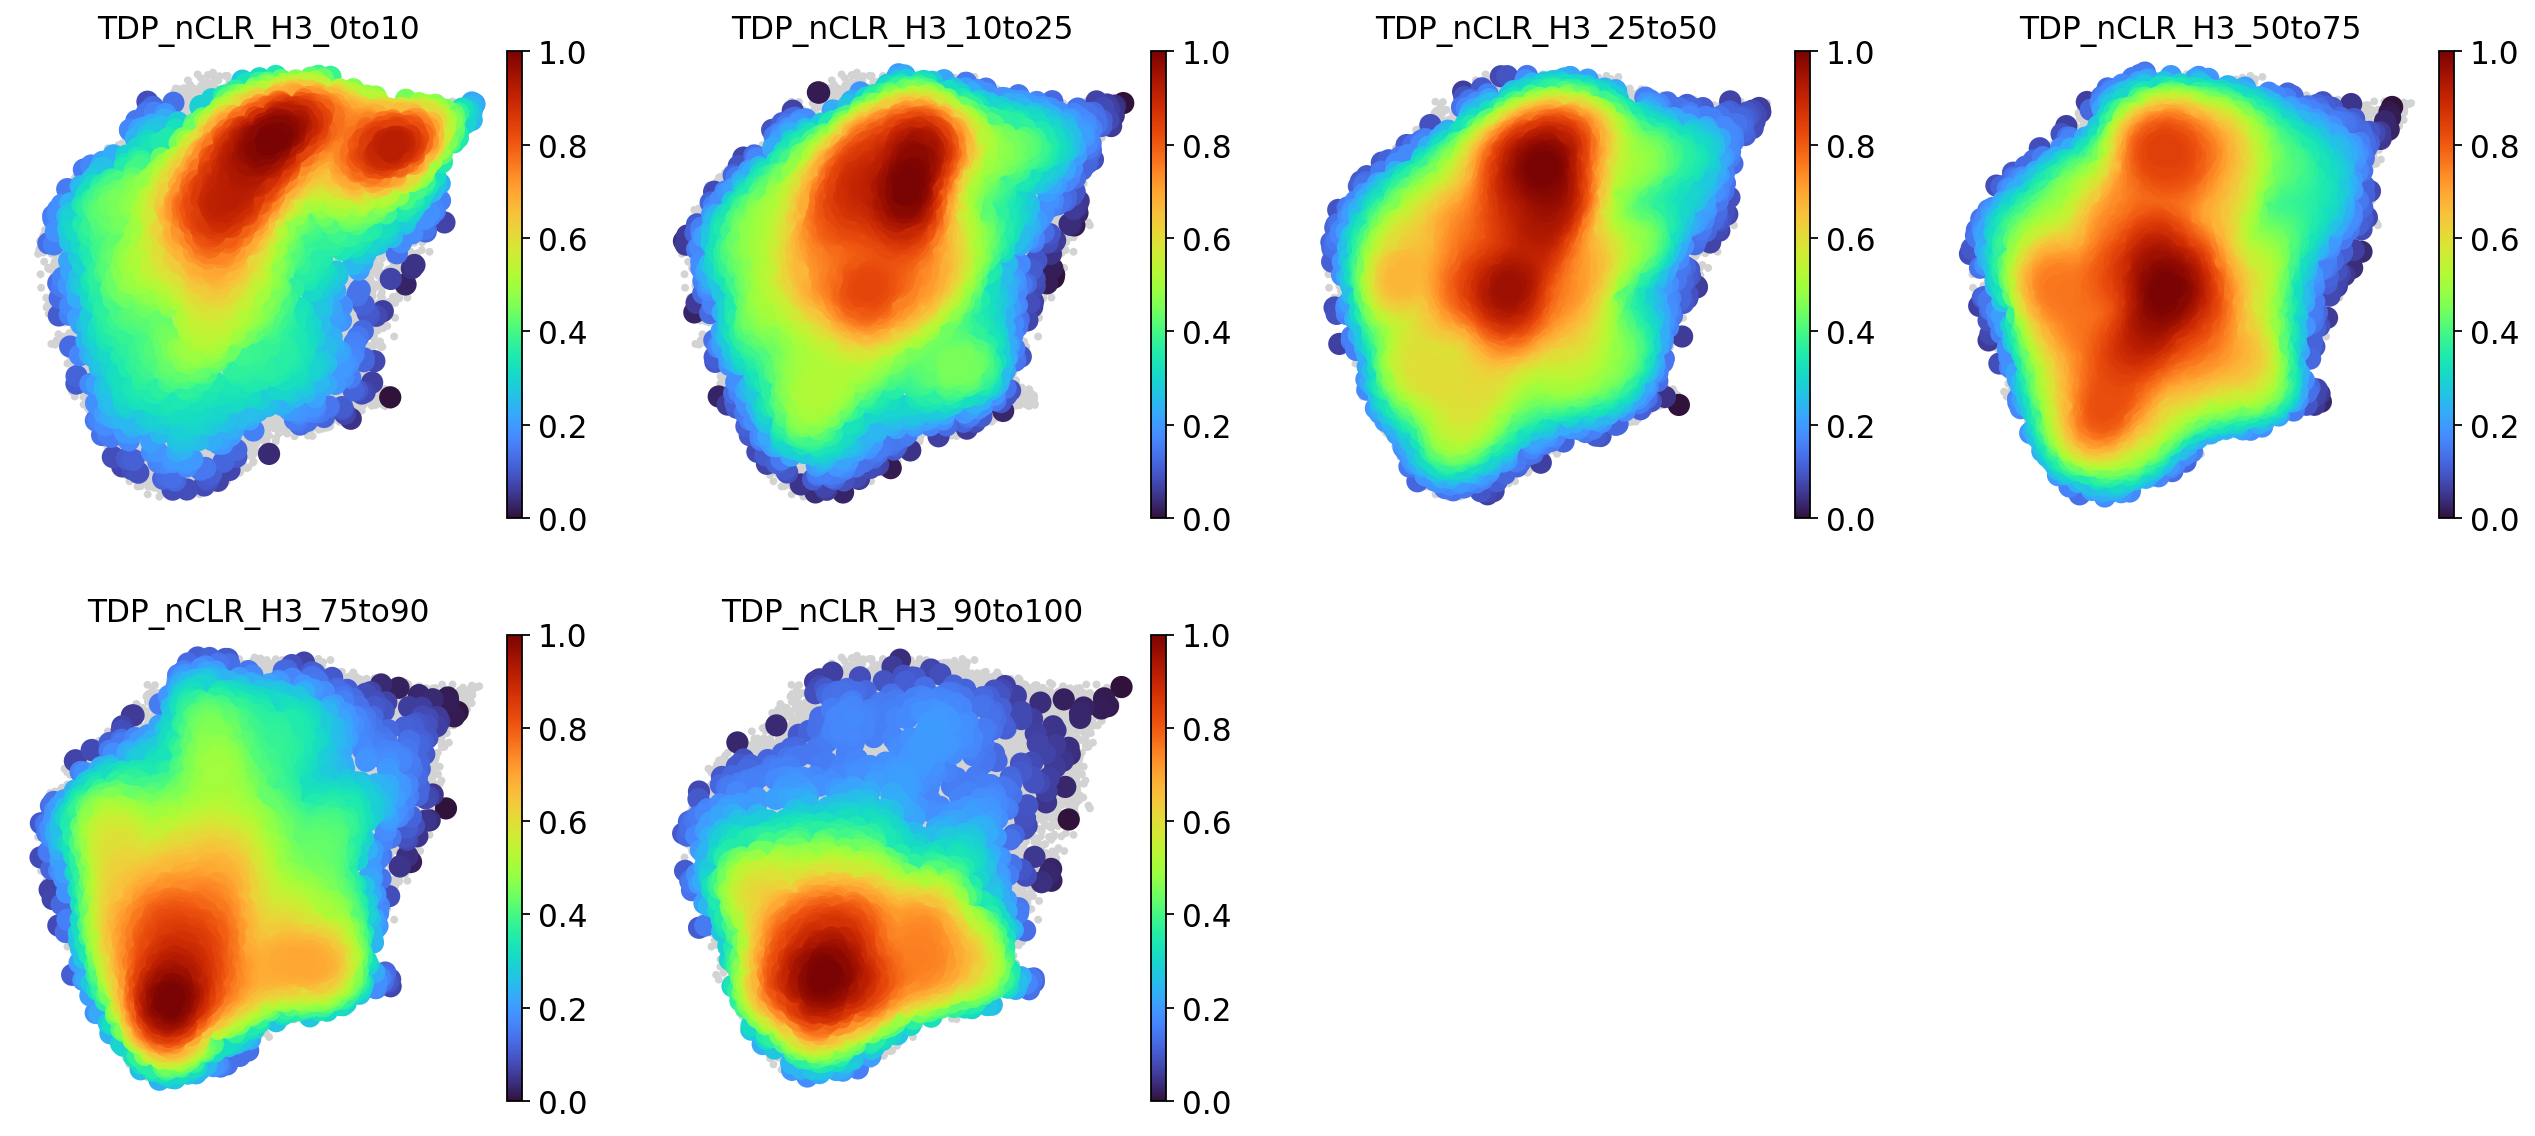

In [16]:
sc.settings.set_figure_params(dpi=80)
#with rc_context({'figure.figsize': (3, 3)}):
sc.pl.embedding_density(adata, basis='umap',color_map='turbo', key='umap_density_pct_TDP_nCLR_H3',fg_dotsize=400, bg_dotsize=50, frameon=False)

In [ ]:
protein_name = "NFKB_nCLR_H3"  # Change this to the desired protein name
column_name = f'total_counts_{protein_name}' 

percentiles = [0.1,0.25, 0.5, 0.75,0.9]

quantiles = adata.obs[column_name].quantile(percentiles)
labels = generate_labels(protein_name, percentiles)

adata.obs[f'pct_{protein_name}'] = adata.obs[column_name].apply(categorize, args=(quantiles, labels))

In [ ]:
print(adata.obs['pct_NFKB_nCLR_H3'].value_counts())

In [ ]:
sc.tl.embedding_density(adata, basis='umap', groupby='pct_NFKB_nCLR_H3')

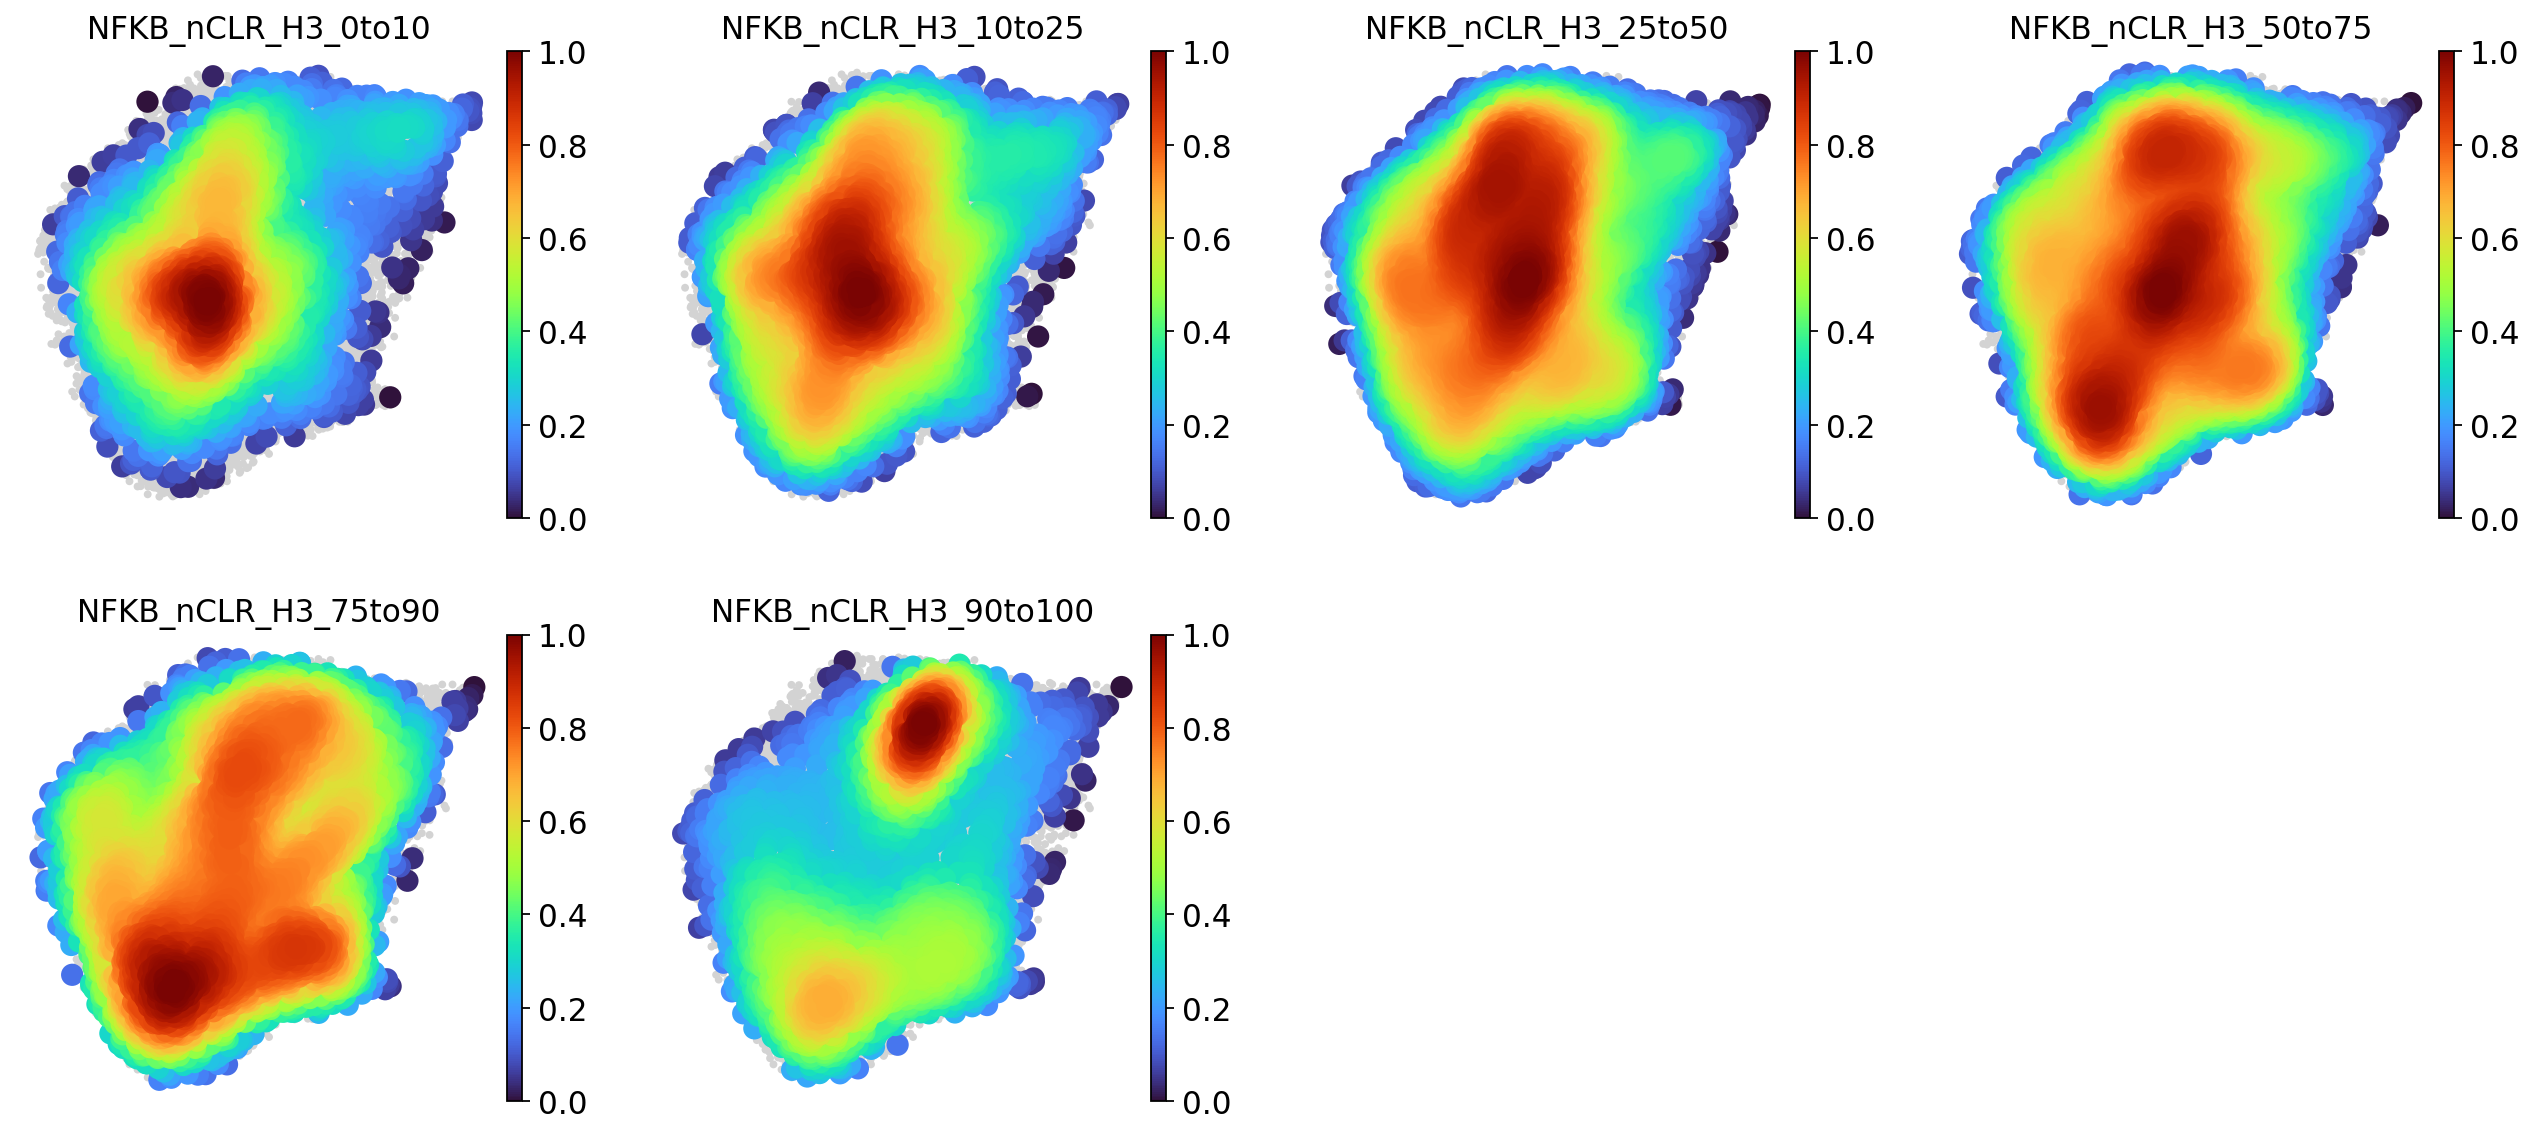

In [17]:
sc.settings.set_figure_params(dpi=80)
#with rc_context({'figure.figsize': (3, 3)}):
sc.pl.embedding_density(adata, basis='umap',color_map='turbo', key='umap_density_pct_NFKB_nCLR_H3',fg_dotsize=400, bg_dotsize=50, frameon=False)

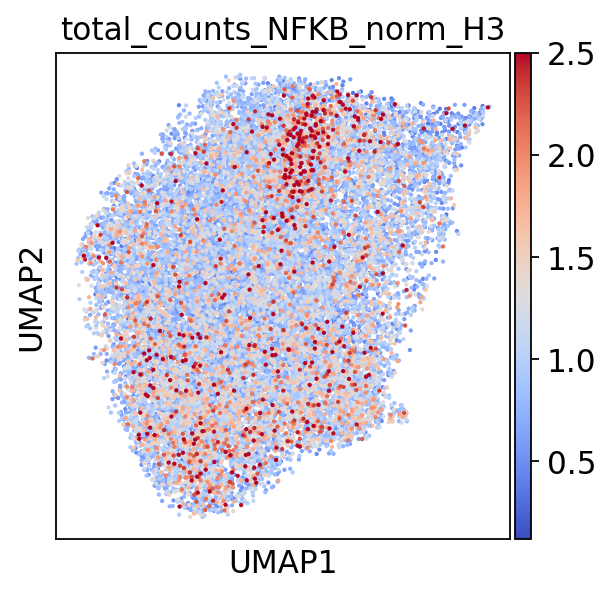

In [18]:
sc.pl.umap(adata, color='total_counts_NFKB_norm_H3',cmap='coolwarm', size=15, vmax=2.5)

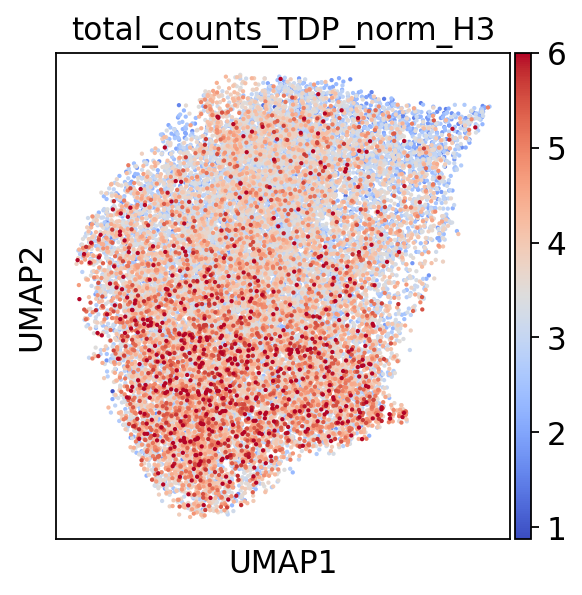

In [14]:
sc.pl.umap(adata, color='total_counts_TDP_norm_H3',cmap='coolwarm', size=15, vmax=6)